Merci de **ne pas modifier** le nom de ce notebook (même pour y inclure son nom).

Quelques conseils:
- pour exécutez une cellule, cliquez sur le bouton *Exécuter* ci-dessus ou tapez **Shift+Enter**
- si l'exécution d'une cellule prend trop de temps, sélectionner dans le menu ci-dessus *Noyau/Interrompre*
- en cas de très gros plantage *Noyau/Redémarrer*
- **sauvegardez régulièrement vos réponses** en cliquant sur l'icone disquette ci-dessus à gauche, ou *Fichier/Créer une nouvelle sauvegarde*

Pour répondre aux questions, remplacer les lignes ci-dessous par vos réponses: 
```python 
#LA REPONSE ICI
raise NotImplementedError()
``` 


---

# TD 3 : Equations différentielles - méthodes avancées

Ce TD a pour objectif d'étudier des méthodes de résolution d'équations différentielles au-delà de la méthode d'Euler et des systèmes d'équations différentielles à une variable.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

## Exercice 1 : RK4 et pendule simple

Dans cet exercice nous allons coder une fonction qui implémente la méthode RK4 de résolution des équations différentielles ordinaires de la forme:
$$ \frac{d Y}{dt}(t) = A\cdot Y(t) + B $$
avec $A$ une matrice, $B$ un vecteur constant et $Y$(t) le vecteur des fonctions à intégrer dépendant de la variable $t$.

La fonction `Euler` ci-dessous permet de réaliser la méthode d'Euler sur un système d'équations différentielles:
- l'argument `fonction` est une fonction python calculant $d Y/d t$ retournée sous forme de numpy.array (pas une liste !);
- l'argument `domaine` est le tableau des instants $t$ où intégrer $Y(t)$;
- l'argument `y0` donne le vecteur des conditions initiales du systèmes $Y(t_0)$ à $t=t_0$ le premier élément de `domaine`.

Le pas d'intégration $\delta t$ du système est directement déduit de la variable `domaine` en supposant les points d'intégration régulièrement espacés.


In [2]:
# EXECUTEZ LA CELLULE AU MOINS UNE FOIS

def Euler(fonction, domaine, y0):
    """ 
    Cette fonction intégre le système d'EDO d'ordre 2 avec les paramètres suivants:
    - fonction : désigne la fonction de définition du système
    - domaine : désigne le domaine d'intégration du système
    - y0 : conditions initiales du système
    """
    y = np.asarray(y0)
    h = domaine[1] - domaine[0]
    out = []
    for t in domaine:
        out.append(y)
        y = y + h*fonction(y,t)
    return np.asarray(out)

1. En s'inspirant de la fonction `Euler`, compléter la fonction `RK4` ci-dessous pour implémenter la méthode RK4.

In [3]:
def RK4(fonction, dom, y0):
    """ 
    Cette fonction intégre le système d'EDO d'ordre 2 avec les paramètres suivants:
    - fonction : désigne la fonction de définition du système
    - domaine : désigne le domaine d'intégration du système
    - y0 : conditions initiales du système
    """
    y = np.asarray(y0)
    h = dom[1] - dom[0]
    out = []
    for t in dom:
        out.append(y)
        k1 = fonction(y,t)
        k2 = fonction(y + h*k1/2,t + h/2)
        k3 = fonction(y + h*k2/2,t + h/2)
        k4 = fonction(y + h*k3,t + h)
        y = y + h/6 * (k1 + 2*k2 + 2*k3 + k4)
    return np.asarray(out)

2. Tester les deux intégrateurs (`Euler` et `RK4`) pour résoudre le problème du pendule simple dans l'approximation des petits angles $\theta$. On rappèle que l'équation différentielle d'ordre 2 à laquelle il obéit peut se réécrire sous la forme de deux équations différentielles couplées d'ordre 1, avec les fonctions $\theta$ et $\Omega= \dot\theta$:
$$ \left\lbrace \begin{array}{ll} \dot\theta & = \Omega \\ \dot\Omega & = - \omega_0^2 \theta \end{array} \right.$$
Pour le test, on pourra prendre $\omega_0=1$, $\theta_0$ petit et $\Omega(t_0)$ nul. On commencera par créer une fonction `Pendule(y,t)` qui renvoie le vecteur $d Y /dt$ en fonction de $Y(t)= (\theta(t), \Omega(t))$ et $t$.

In [4]:
def Pendule(y, t, wo = 1):
    Y =np.array((y[1],-wo**2 *y[0]))
    return Y


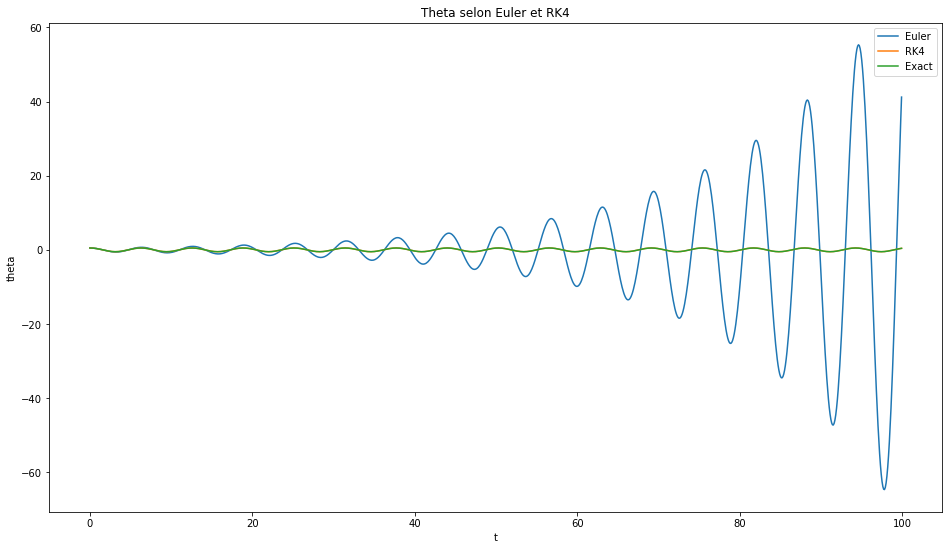

In [5]:
dom = np.arange(0,100,0.1)
yo = np.array([0.5,0])
wo=1

#Euler
F_eul = Euler(Pendule, dom, yo)

theta_eul = F_eul[:,0]
om_eul = F_eul[:,1]


#RK4
F_RK = RK4(Pendule, dom, yo)

theta_RK = F_RK[:,0]
om_RK = F_RK[:,1]

#exact
theta_ex = 0.5*np.cos(wo*dom)

fig = plt.figure(figsize=(16,9))
plt.plot(dom, theta_eul, label ="Euler")
plt.plot(dom, theta_RK, label ="RK4")
plt.plot(dom,theta_ex, label='Exact')
plt.title("Theta selon Euler et RK4")
plt.xlabel('t')
plt.ylabel('theta')
plt.legend()
plt.show()





3. Tracer les réponses temporelles $\theta(t)$ obtenues pour les deux intégrateurs sur un même graphe, pour un domaine large d'au moins une dizaine de période. Superposer la solution théorique attendue pour ce système. Que constatez-vous ? Comment cela dépend-il du pas d'intégration $\delta t$ ?

*Indice: le tableau renvoyé par les intégrateurs contient autant de lignes que de pas d'intégration et les valeurs des fonctions sont dans les colones; pour tracer la colonne $i$ en fonction du temps, il suffit de prendre out[:, j].*

LA REPONSE ICI (double-clique pour editer la cellule)

## Exercice 2 : équation de l'eikonale

L'[équation de l'eikonale](https://fr.wikipedia.org/wiki/%C3%89quation_eikonale) est la version continue et différentielle de la loi de la réfraction de Snell-Descartes. Elle décrit la trajectoire suivie par un rayon lumineux dans un espace d'indice optique $n$ variable. Si la trajectoire est paramétrée par l'abscisse curviligne $s$, l'équation de l'eikonale s'écrit:
$$ \frac{d}{ds} \left( n \frac{d \vec r}{ds}\right) = \vec \nabla n
\Leftrightarrow \left\lbrace \begin{array}{ll} 
\frac{d}{ds} \left( n u_x\right) & = \frac{d n}{d x}\\
\frac{d}{ds} \left( n u_y\right) & = \frac{d n}{d y}
\end{array} \right.
$$
avec $d \vec r / ds = \vec u$ le vecteur tangent à la trajectoire du rayon et $n$ une *fonction qui dépend de la position*. On rappelle que la première loi de Descartes stipule que les rayons réfractés et réfléchis sont contenus dans le plan d'incidence donc le problème est à deux dimensions.

Dans cet exercice, nous allons calculer la trajectoire de rayons lumineux dans différents milieux et comparer encore une fois les méthodes d'Euler et RK4 à l'aide des fonctions codées dans l'exercice 1. Tout d'abord il faut mettre en forme l'équation différentielle d'ordre 2 en systèmes d'équations d'ordre 1. Si on introduit un vecteur $\vec v = n \vec u$, alors on a:
$$ \displaystyle
 \left\lbrace \begin{array}{l} 
\frac{d}{ds} \left( n \frac{d \vec r}{ds}\right)   = \vec \nabla n \\
\vec v   = n \vec u
\end{array}
\right.
\Leftrightarrow \left\lbrace \begin{array}{l} 
\frac{d v_x}{ds}   = \frac{d n}{d x}\\
\frac{d v_y}{ds}   = \frac{d n}{d y} \\
\frac{d x}{ds} = \frac{v_x}{n} \\
\frac{d y}{ds} = \frac{v_y}{n} 
\end{array} \right.
$$

1. De la même manière que vous avez écrit une fonciont `Pendule(y, t)` dans l'exercice 1, écrivez une fonction `Eikonale(V, s)` qui renvoie un *numpy.array* des dérivées du système d'équations différentielles ci-dessus, avec `V` un tableau contenant les coordonnées $x$ et $y$ du rayon à l'abscisse $s$, ainsi que les composantes $v_x$ et $v_y$. Attention, il faudra considérer $n$ comme une fonction $n(x, y)$ et calculer numériquement son gradient en $x + dx$ et $y +dy$ avec $dx = v_x ds/n(x,y)$ et $dy = v_y ds / n(x,y)$ (on voit bien que $dx$, $dy$ et $ds$ sont liés et non indépendants). 

*Indice: les fonctions `indice(x, y)` et le pas `ds` sont des quantités définies à l'extérieur de la fonction `Eikonale`, car celle-ci ne peut accepter que deux arguments pour fonctionner avec les fonctions `Euler`et `RK4`.*

In [6]:
def Eikonale(V,s):
    x,y,vx,vy = V
    n = indice(x,y)
    x_der = vx/n
    y_der = vy/n
    
    dx = x_der*ds
    dy = y_der*ds
    dn_x = indice(x+dx, y) - n
    dn_y = indice(x, y+dy) - n
    
    vx_der = dn_x/dx
    vy_der = dn_y/dy
    
    V_der = np.array([x_der, y_der, vx_der, vy_der])
    return V_der
    

### Mirage dans le désert

Dans ce premier exemple, on simule l'indice optique de l'air dans un désert par la fonction `indice(x, y)`. Plus chaud près du sol, il est moins dense et son indice optique plus faible que dans les couches plus élevées de l'atmosphère.

<ipython-input-7-f8e4352bc1a7>:9: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = plt.pcolor(xx, yy, indice(xx, yy), cmap="Greys")


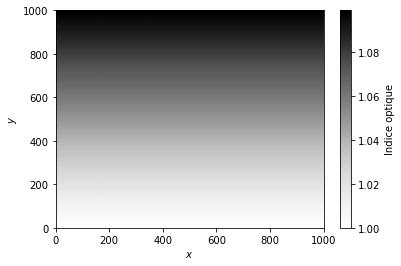

In [7]:
def indice(x, y):
    n0 = 1
    return n0 * (1 + 0.0001 * y) 

N = 1000
n = np.ones((N,N))
yy, xx = np.meshgrid(np.linspace(0,N,100), np.linspace(0,N,100))
    
im = plt.pcolor(xx, yy, indice(xx, yy), cmap="Greys")
plt.colorbar(im, label="Indice optique")
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

2. En utilisant les fonctions `Euler` et `RK4`, intégrer le système d'équations différentielles pour trouver la trajectoire d'un rayon lumineux dans un milieu défini par la fonction `indice(x, y)`, partant d'une altitude $y_0 = 5000$ à la cote $x_0=0$ et un vecteur $\vec u_0$ faisant un angle de -45° avec l'horizontal. Représenter la trajectoire des rayons lumineux et choisir un pas $ds$ et un $s_{max}$ convenables pour faire apparaître le phénomène de mirage optique. Commenter l'usage des méthodes d'Euler ou RK4.

*Indice: vous pouvez obtenir une figure de la forme:*
<img style="float:center;" src="plots/mirage.png" width="400px"/> 

<ipython-input-8-1550ad4c63db>:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = plt.pcolor(xx, yy, indice(xx, yy), cmap="Greys")


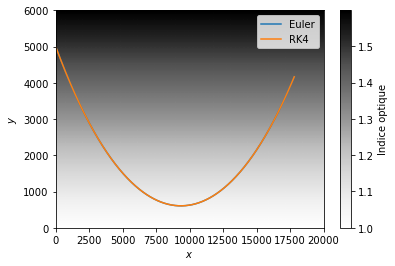

In [8]:
uo = -45*np.pi/180
s_max = 20000
ds= 1
s= np.arange(0,s_max,ds)
no = indice(0,5000)

yo = np.array([0,5000,no* np.cos(uo), no* np.sin(uo)])

#Euler
Eiko_eul = Euler(Eikonale, s, yo)

x_eul = Eiko_eul[:,0]
y_eul = Eiko_eul[:,1]


#RK4
Eiko_RK = RK4(Eikonale, s, yo)

x_RK = Eiko_RK[:,0]
y_RK = Eiko_RK[:,1]


Ny = 20000
Nx = 6000
n = np.ones((N,N))
yy, xx = np.meshgrid(np.linspace(0,Nx,600), np.linspace(0,Ny,600))

fig = plt.figure()
im = plt.pcolor(xx, yy, indice(xx, yy), cmap="Greys")
plt.plot(x_eul,y_eul, label = "Euler")
plt.plot(x_RK,y_RK, label = "RK4")
plt.colorbar(im, label="Indice optique")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()


### Fibre optique à gradient d'indice

Une fibre optique à gradient d'indice possède un coeur d'indice optique plus dense que son extérieur pour guider la lumière par réfraction d'une extrémité à l'autre. On peut modéliser son indice optique par la fonction:
$$ n(x, y) =  \left\lbrace\begin{array}{ll}  n_0 \left(1 - \frac{y^2}{4 R^2} \right) &\text{ si } |y| < R \\
 1  &\text{ si } |y| > R
\end{array}\right.$$

3. Ecrire une nouvelle fonction `indice(x, y)` pour la fibre optique. Intégrer le système d'équations différentielles par les deux méthodes, pour un rayon entrant dans la fibre en $(x_0, y_0)=(0,0)$ avec un angle de 30°. Représenter les rayons lumineux et commenter. On pourra prendre $n_0 = 1.5$ et $R=1$.

*Indice: commencer avec $s_{max} = 100$ et $ds=0.01$, puis varier.*

<ipython-input-9-e1525f93a9b9>:57: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = plt.pcolor(xx, yy, n, cmap="Greys")


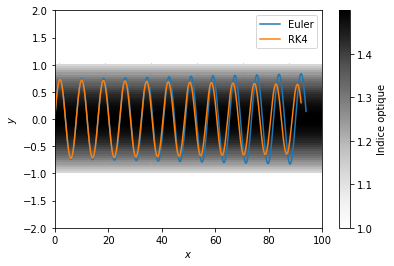

In [9]:
def indice_new(x,y, no = 1.5, R=1):
    if np.abs(y)<R :
        return no*(1- y**2/(4*R**2))
    
    return 1

def Eikonale_new(V,s):
    x,y,vx,vy = V
    n = indice_new(x,y)
    x_der = vx/n
    y_der = vy/n
    
    dx = x_der*ds
    dy = y_der*ds
    dn_x = indice_new(x+dx, y) - n
    dn_y = indice_new(x, y+dy) - n
    
    vx_der = dn_x/dx
    vy_der = dn_y/dy
    
    V_der = np.array([x_der, y_der, vx_der, vy_der])
    return V_der


uo = 30*np.pi/180
s_max = 100
ds= 0.01
s= np.arange(0,s_max,ds)
no = indice_new(0,0)

yo = np.array([0,0,no* np.cos(uo), no* np.sin(uo)])

#Euler
Eiko_eul = Euler(Eikonale_new, s, yo)

x_eul = Eiko_eul[:,0]
y_eul = Eiko_eul[:,1]


#RK4
Eiko_RK = RK4(Eikonale_new, s, yo)

x_RK = Eiko_RK[:,0]
y_RK = Eiko_RK[:,1]


Ny = 1
Nx = 100
yy, xx = np.meshgrid(np.linspace(-2,2,100), np.linspace(0,100,100))

n= np.zeros_like(xx)
for i in range(100):
    for j in range(100):
        n [i,j] = indice_new(xx[i,0], yy[0,j])

fig = plt.figure()
im = plt.pcolor(xx, yy, n, cmap="Greys")
plt.plot(x_eul,y_eul, label = "Euler")
plt.plot(x_RK,y_RK, label = "RK4")
plt.colorbar(im, label="Indice optique")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

LA REPONSE ICI (double-clique pour editer la cellule)

## Lentille de Luneburg (facultatif)

On définit une lentille de Maxwell par le fonction de l'indice optique:
$$ n(x, y) =  \left\lbrace\begin{array}{ll}  n_0  \sqrt{2 - \frac{r^2}{R^2} } &\text{ si } r < R \\
 n_0  &\text{ si } r > R
\end{array}\right.$$
avec $r = \sqrt{x^2+y^2}$.

4. Tracer les rayons lumineux avec RK4 pour une telle lentille lorsqu'ils partent du point $(x_0, y_0)=(-R, 0)$ pour différents angles. La lentille est-elle bien convergente ?

*Indice: on pourra prendre $n_0=1$ et $R=200$ pour commencer.*

In [10]:
#LA REPONSE ICI
raise NotImplementedError()

NotImplementedError: 

## Lentille de Maxwell (facultatif)

On définit une lentille de Maxwell par le fonction de l'indice optique:
$$ n(x, y) =  \left\lbrace\begin{array}{ll}  n_0  / \left(1 + \frac{r^2}{R^2} \right) &\text{ si } r < R \\
 n_0 / 2  &\text{ si } r > R
\end{array}\right.$$
avec $r = \sqrt{x^2+y^2}$.

5. Tracer les rayons lumineux avec RK4 pour une telle lentille lorsqu'ils partent du point $(x_0, y_0)=(-R, 0)$ pour différents angles. La lentille est-elle bien convergente ?

*Indice: on pourra prendre $n_0=2$ et $R=200$ pour commencer.*

In [ ]:
#LA REPONSE ICI
raise NotImplementedError()

## Exercice 3: Gauss, Siedel et Poisson (sont sur un condensateur...)

Dans cet exercice nous allons calculer le champ de potentiel électrique dans un condensateur. En effet, en électrostatique, le potentiel électrique $V$ vérifie l'équation de Poisson:
$$\Delta V(\vec r) = - \frac{\rho(\vec r)}{\epsilon_0}$$
avec $\rho(\vec r)$ la densité volumique de charge électrique à la position $\vec r$.

Pour mettre en oeuvre les algorithmes vus en cours, nous allons nous restreindre à $D=2$ dimensions, et on prendra $\epsilon_0=1$.

1.a. **Méthode de Jacobi:** Compléter la fonction `poisson_solver_jacobi` avec l'algorithme de Jacobi décrit en cours.

In [12]:
def poisson_solver_jacobi(V, f=None, max_iterations=1e4, fixed=None, delta=1, eps=1e-6):
    """Résolution de l'équation de Poison par la méthode de Jacobi.
    - V: tableau 2D du potentiel électrique
    - f: tableau 2D du terme source (-rho pour l'équation de l'électrostatique)
    - max_iterations: entier donnant le nombre max d'itérations avant de sortie de l'algo (1e2 pour des tests, 1e5 pour le calcul final)
    - fixed: tableau 2D de booléen marquant par True les points fixés par les conditions aux limites
    - delta: nombre réel donnant le pas de discrétisation de l'espace
    - eps: nombre réel donnant la tolérance à atteindre sur la variation de l'erreur sur V après une itération
    """
    if f is None: 
        f = np.zeros_like(V)
    Ny, Ny = V.shape
    iterations = 0  # Compteur des itérations
    error = 1e4  # Erreur initialisée très grande
    V_init = np.copy(V)
    while error > eps and iterations < max_iterations :
        iterations += 1
        V_cop = np.copy(V)
        for i in range(1,Nx-1):
            for j in range(1,Ny-1):
                V[i,j] = 0.25*(V_cop[i+1,j] + V_cop[i-1,j] + V_cop[i,j+1] + V_cop[i, j-1]) - 0.25*f[i,j]*delta**2
        
        if fixed is not None :
            V[fixed]= V_init[fixed]

        error = np.sqrt(np.mean((V-V_cop)**2))
        

    
    print("iterations =", iterations, " error=", error)
    return V

1.b. Appliquer la méthode de Jacobi au calcul du champ de potentiel électrique dans un condensateur. On prendra $N_x=N_y=N=100$, et on le modélisera par des valeurs du champ forcées à $V_0=+10\,$V en $y=3N/5$ pour $x\in\left[ N/4,3N/4\right]$ et à $-10\,$V en $y=2N/5$ pour $x\in\left[ N/4,3N/4\right]$. On choisira un champ nul à l'infini, ie sur les bords du domaine. Puisqu'on impose la tension électrique aux bornes du condensateur, on en déduit que $\rho = C (V_0 - (-V_0))=2CV_0$ mais on remarquera par la suite qu'on peut choisir $\rho=0$ dans la résolution numérique puisqu'on impose le potentiel sur les armatures via les conditions aux limites.

In [20]:
N = 100
J, I = np.mgrid[:N, :N]
delta = 1

Vo = np.zeros((N,N))
fixed = np.zeros((N,N)).astype(bool)
fixed[int(3*N/5),int(N/4):int(3*N/4)]=True
fixed[int(2*N/5),int(N/4):int(3*N/4)]=True
Vo[int(3*N/5),int(N/4):int(3*N/4)]=10
Vo[int(2*N/5),int(N/4):int(3*N/4)]=-10

V = poisson_solver_jacobi(Vo, fixed = fixed)


iterations = 4761  error= 9.995435509378945e-07


1.c. Tracer le résultat avec la fonction `plot_potentiel_electrique` ci-dessous (elle trace aussi le champ électrique sous forme de flèches). Que pensez-vous de la rapidité de convergence et de l'allure du résultat ?

In [14]:
# EXECUTEZ LA CELLULE AU MOINS UNE FOIS

def plot_potentiel_electrique(I, J, V, ncontours=40, title="", vmin=None, vmax=None, cmap="bwr"):
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    CS = ax.contour(I, J, V, ncontours, cmap=cmap)  # Make a contourplot
    CB = plt.colorbar(CS, ax=ax, shrink=0.8, extend='both')
    CB.set_label('Potentiel électrique [V]')
    ax.set_xlim(0, N)
    ax.set_ylim(0, N)
    ax.set_xlabel('X [pixels]')
    ax.set_ylabel('Y [pixels]')
    ax.set_aspect("equal")
    if title != "":
        ax.set_title(title)
    U, W = np.gradient(V)
    Q = ax.quiver(I[::5,::5], J[::5,::5], W[::5,::5], U[::5,::5]) #, units='width')
    qk = ax.quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',
                       coordinates='figure')
    plt.show()

<ipython-input-14-a8bd34ec1fa4>:6: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, ax=ax, shrink=0.8, extend='both')


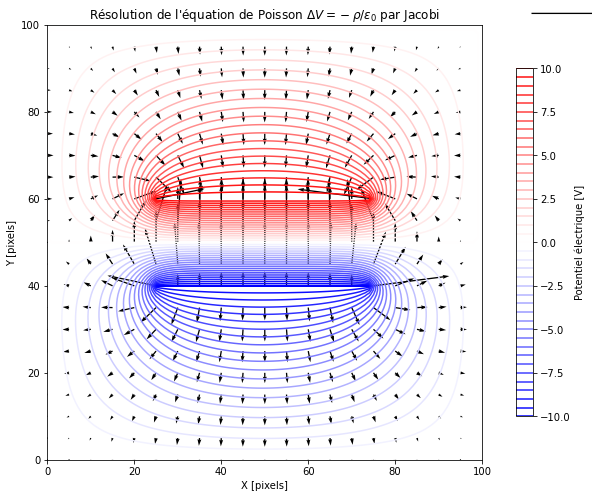

In [15]:
plot_potentiel_electrique(I, J, Vo, title=r"Résolution de l'équation de Poisson $\Delta V = - \rho / \epsilon_0$ par Jacobi")

LA REPONSE ICI (double-clique pour editer la cellule)

2. **Méthode de Gauss-Siebel:** Dupliquer la fonction `poisson_solver_jacobi` pour créer une fonction `poisson_solver_gauss_siebel` dans laquelle on implémente l'algorithme de Gauss-Siebel décrit en cours. Tracer le résultat obtenu pour le même condensateur et commenter la convergence.

iterations = 1  error= 0.0


<ipython-input-14-a8bd34ec1fa4>:6: MatplotlibDeprecationWarning: The 'extend' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  CB = plt.colorbar(CS, ax=ax, shrink=0.8, extend='both')


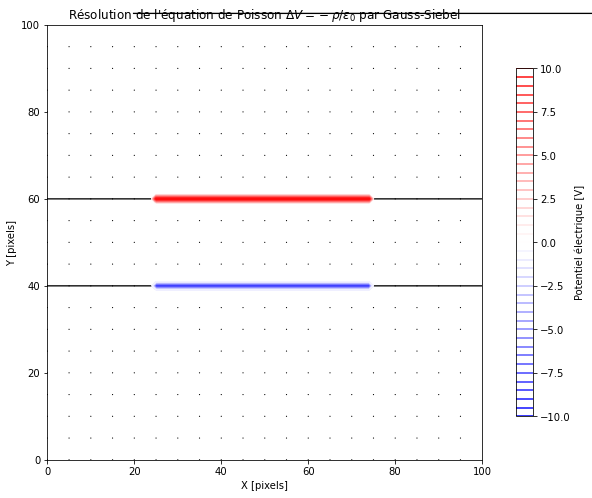

In [19]:
def poisson_solver_gauss_siedel(V, f=None, max_iterations=1e4, fixed=None, delta=1, eps=1e-6):
    """Résolution de l'équation de Poison par la méthode de Gauss-Siedel.
    - V: tableau 2D du potentiel électrique
    - f: tableau 2D du terme source (-rho pour l'équation de l'électrostatique)
    - max_iterations: entier donnant le nombre max d'itérations avant de sortie de l'algo (1e2 pour des tests, 1e5 pour le calcul final)
    - fixed: tableau 2D de booléen marquant par True les points fixés par les conditions aux limites
    - delta: nombre réel donnant le pas de discrétisation de l'espace
    - eps: nombre réel donnant la tolérance à atteindre sur la variation de l'erreur sur V après une itération
    """
    if f is None: 
        f = np.zeros_like(V)
    NY, NX = V.shape
    iterations = 0
    error = 1e4  # Large dummy error
    V_init = np.copy(V)
    while error > eps and iterations < max_iterations :
        iterations += 1
        V_cop = np.copy(V)
        for i in range(1,Nx-1):
            for j in range(1,Ny-1):
                V[i,j] = 0.25*(V[i+1,j] + V[i-1,j] + V[i,j+1] + V[i, j-1]) - 0.25*f[i,j]*delta**2
        
        if fixed is not None :
            V[fixed]= V_init[fixed]

        error = np.sqrt(np.mean((V-V_cop)**2))
    print("iterations =", iterations, " error=", error)
    return V

# Execution de la fonction et tracé:
N = 100
J, I = np.mgrid[:N, :N]
delta = 1

Vo = np.zeros((N,N))
fixed = np.zeros((N,N)).astype(bool)
fixed[int(3*N/5),int(N/4):int(3*N/4)]=True
fixed[int(2*N/5),int(N/4):int(3*N/4)]=True
Vo[int(3*N/5),int(N/4):int(3*N/4)]=10
Vo[int(2*N/5),int(N/4):int(3*N/4)]=-10

V = poisson_solver_gauss_siedel(Vo, fixed = fixed)

plot_potentiel_electrique(I, J, Vo, title=r"Résolution de l'équation de Poisson $\Delta V = - \rho / \epsilon_0$ par Gauss-Siebel")

LA REPONSE ICI (double-clique pour editer la cellule)

3. **Méthode de Gauss-Siebel avec sur-relaxation:** Dupliquer la fonction `poisson_solver_gauss_siebel` pour créer une fonction `poisson_solver_sur_relaxation` dans laquelle on implémente l'algorithme de Gauss-Siebel décrit en cours. On choisira d'abord une valeur de $\omega$ égale à $\omega_{\text{opt}}$ puis en cas de déraillage de l'algorithme on se contentera de 90% ou 80% de cette valeur. Tracer le résultat obtenu pour le même condensateur et commenter la convergence.

In [ ]:
def poisson_solver_sur_relaxation(V, f=None, max_iterations=1e4, fixed=None, delta=1, eps=1e-6):
    """Résolution de l'équation de Poison par la méthode de Gauss-Siedel avec sur-relaxation.
    - V: tableau 2D du potentiel électrique
    - f: tableau 2D du terme source (-rho pour l'équation de l'électrostatique)
    - max_iterations: entier donnant le nombre max d'itérations avant de sortie de l'algo (1e2 pour des tests, 1e5 pour le calcul final)
    - fixed: tableau 2D de booléen marquant par True les points fixés par les conditions aux limites
    - delta: nombre réel donnant le pas de discrétisation de l'espace
    - eps: nombre réel donnant la tolérance à atteindre sur la variation de l'erreur sur V après une itération
    """
    if f is None: 
        f = np.zeros_like(V)
    NY, NX = V.shape
    iterations = 0
    error = 1e4  # Large dummy error
    V_init = np.copy(V)
    #LA REPONSE ICI
    raise NotImplementedError()
    print("iterations =", iterations, " error=", error)
    return V


# Execution de la fonction et tracé:
#LA REPONSE ICI
raise NotImplementedError()

LA REPONSE ICI (double-clique pour editer la cellule)

4. **Méthode de Jacobi vectorialisée (facultatif):** Dupliquer la fonction `poisson_solver_jacobi` pour créer une fonction `poisson_solver_numpy` dans laquelle on va vectorialiser l'algorithme de Jacobi. On l'a déjà vu, les boucles en python sont très lentes comparées au calcul direct sur des tableaux avec `numpy`. Remplacer la double boucle sur $N_x$ et $N_y$ par une unique ligne calculant $V$ pour tous les indices en utilisant des sommes de `numpy.array`. Tracer le résultat obtenu pour le même condensateur et commenter la convergence.

In [ ]:
def poisson_solver_numpy(V, rho=None, max_iterations=1e4, fixed=None, delta=1, eps=1e-6):
    if rho is None: 
        rho = np.zeros_like(V)
    NY, NX = V.shape
    iterations = 0
    error = 1e4  # Large dummy error
    V_init = np.copy(V)
    #LA REPONSE ICI
    raise NotImplementedError()
    print("iterations =", iterations, " error=", error)
    return V

# Execution de la fonction et tracé:
#LA REPONSE ICI
raise NotImplementedError()

LA REPONSE ICI (double-clique pour editer la cellule)

## Exercice 4: Newton, Poisson et Fourier (sont sur une planète...)

La loi de la gravitation universelle de Newton peut se mettre sous la forme d'une équation de Poisson
$$ \Delta \Phi(\vec r) = 4 \pi G_N \rho(\vec r) $$
avec $\Phi(\vec r)$ le potentiel gravitationnel, $G_N$ la constante de la gravitation universelle et $\rho(\vec r)$ la répartition de la masse volumique dans l'espace considéré. 

Dans cet exercice, nous allons résoudre cette équation de Poisson numériquement en utilisant la méthode impliquant la transformée de Fourier (voir cours). On considérera un espace à deux dimensions seulement, et on pose $4\pi G_N=1$.

La fonction suivante a pour but de résoudre l'équation de Poisson associée à un champ `phi` et une masse volumique `rho` par FFT.

1. Compléter la fonction: 
    - réaliser la FFT 3D de `rho` avec `np.fft.fftn`
    - créer les trois projetés $k_x$, $k_y$ et $k_z$ du vecteur d'onde $\vec k$ avec `fftfreq` (attention au facteur $2\pi$!)
    - créer un tableau 3D de la norme carrée du vecteur d'onde $\Vert \vec k\Vert^2$
    - former le tableau de la transformée de Fourier $\hat \Phi(\vec k)$ (voir cours)
    - traiter le cas $\vec k = \vec 0$
    - calculer $\Phi(\vec r)$ par FFT  inverse avec `np.fft.ifftn` (le tableau résultant sera complexe par défaut, on retournera sa partie réelle).
    
*Indice: il n'est pas nécessaire d'utiliser les `fftshift` pour ces opérations.*

In [ ]:
def poisson_solver_fourier(phi, rho):
    NZ, NY, NX = phi.shape
    #LA REPONSE ICI
    raise NotImplementedError()
    return phi.real

2. Testons la fonction pour un système à deux corps. Un astre de densité `rho = 2` est placé en `(2N/5, N/2, N/2)` et un second de densité `rho = 1` se situe en `(3N/5, N/2, N/2)`. Créer le tableau `rho` correspondant et calculer le champ gravitationnel $\Phi$ avec la fonction `poisson_solver_fourier`. *On prendra N=100 pour les tests et on ne dépassera pas N=500.*

In [ ]:
N = 100
K, J, I = np.mgrid[:N, :N, :N]

#LA REPONSE ICI
raise NotImplementedError()

phi_f = poisson_solver_fourier(phi, rho)

3. La fonction suivante permet le tracé de la carte du potentiel $\Phi$ et des lignes équipotentielles dans le plan $z=N/2$. Tracer le résultat obtenu à la questino précédente. Le champ $\Phi(\vec r)$ calculé par Fourier vous semble-t-il correct ?

In [ ]:
# EXECUTEZ LA CELLULE AU MOINS UNE FOIS

def plot_potentiel_gravitationnel(I, J, K, phi, ncontours=200, title="", vmin=None, vmax=None, cmap="gist_heat"):
    NZ, NY, NX = phi.shape
    fig, ax = plt.subplots(1, 1, figsize=(12,8))
    field =  phi[int(N/2)]
    norm = colors.SymLogNorm(linthresh=0.005*np.nanmax(np.abs(field)))
    im = ax.pcolor(I[0], J[0], field, cmap=cmap, norm=norm)
    CS = ax.contour(I[0], J[0], field, ncontours, cmap="cividis", norm=norm)  # Make a contourplot
    CB = plt.colorbar(im, ax=ax, shrink=0.8, extend='both')
    CB.set_label('Potentiel gravitationnel [UA]')
    ax.set_xlim(0, NX)
    ax.set_ylim(0, NY)
    ax.set_xlabel('X [pixels]')
    ax.set_ylabel('Y [pixels]')
    ax.set_aspect("equal")
    if title != "":
        ax.set_title(title)
    plt.show()

In [ ]:
plot_potentiel_gravitationnel(I, J, K, phi_f, title=r"Résolution numérique de l'équation de Poisson $\Delta \Phi =4\pi G_N\rho$")

LA REPONSE ICI (double-clique pour editer la cellule)

4. Pour vérifier le calcul précédent, on peut calculer le champ $\Phi(\vec r)$ analytiquement puisque la loi de Newton nous dit que le potentiel doit s'écrire, pour une collection de $N$ masses ponctuelles $M_i$:
$$ \Phi(\vec r) = \sum_{i=1}^N -\frac{G M_i}{\Vert \vec r - \vec r_i \Vert} $$
avec $\vec r_i$ la position de la masse $M_i$.

*Indice: voici une figure du potentiel gravitationnel calculé analytiquement:*
<img style="float:center;" src="plots/potentiel_analytique.png" width="800px"/> 

In [ ]:
def phi_analytique(i, j, k):
    # preparation du tableau: même taille que le tableau d'indice, flottant
    phi = np.zeros_like(i).astype(float)
    #LA REPONSE ICI
    raise NotImplementedError()
    # remplacement des valeurs infinies par des not-a-number (masquées dans les figures)
    phi[phi==-np.inf] = np.nan
    return phi

phi_a = phi_analytique(I, J, K)

plot_potentiel_gravitationnel(I, J, K, phi_a, title=r"Résolution analytique de l'équation de Poisson $\Delta \Phi =4\pi G_N\rho$")

5. On trace les résidus, ie les écarts aux valeurs attendues, avec la cellule suivante. Comment évolue l'amplitude maximale des résidus avec N ? (On ne dépassera pas N=500). Quelles structures apparaissent et d'après-vous d'où viennent-elles ? Pourquoi a-t-on un résidu constant sur les bords de l'image ?

In [ ]:
residus = np.zeros_like(phi_a)
residus = (phi_f-phi_a)

plot_potentiel_gravitationnel(I, J, K, residus, title=r"Résidus", vmin=-np.nanmax(np.abs(residus)), vmax=np.nanmax(np.abs(residus)), cmap="bwr")

LA REPONSE ICI (double-clique pour editer la cellule)

## Exercice 5: diffusion de la chaleur (facultatif)

L'objectif de cet exercice est de reproduire la figure animée de diffusion de la chaleur qui se trouve dans le cours. Créer un tableau de température de taille $N_x=100$ et $N_y=50$. Initialiser les bords à des températures imposées par l'extérieur. Visualiser le résultat donné par `poisson_solver_jacobi` ou `poisson_solver_numpy` pour un nombre maximal d'itérations croissants: observer la diffusion de la chaleur dans le matériau.

In [ ]:
#LA REPONSE ICI
raise NotImplementedError()